In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

## Reading data

In [148]:
data = pd.read_csv('D:\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv' )
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Analysing the data

In [149]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data preparation for modelling

### Cleaning and handling blanks

In [151]:
data.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [152]:
#replaceing select in specialization with 'Not working' cateogry where What is your current occupation is in studnet and unemployed category
data.Specialization[data['What is your current occupation'].isin(['Student', 'Unemployed']) &\
                    data['Specialization'].isin(['Select'])] = 'Not working'

#changing other columns select to nan
data.replace('Select', np.nan, inplace = True)

#changing nan to Not sure in lead quality column as it is the safest substitute
data['Lead Quality'].replace(np.nan, 'Not Sure', inplace = True)

C:\Users\Artik Gupta\AppData\Local\Temp\ipykernel_13212\309273779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Specialization[data['What is your current occupation'].isin(['Student', 'Unemployed']) &\


In [153]:
#checking for null values
data.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1480
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [154]:
#dropping columns having high null values > 3000 also removing tags column as it shows high correlation with target variable
data = data[data.columns[data.isna().sum() < 3000]]
data.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1480
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [155]:
#changing Yes and No to binary
data.replace(['Yes', 'No'], [1, 0], inplace = True)

#filling nan
data['Country'] = data['Country'].fillna(data.Country.mode()[0])
data['What is your current occupation'] = data['What is your current occupation'].fillna(data['What is your current occupation'].mode()[0])
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].fillna(data['What matters most to you in choosing a course'].mode()[0])
data.Specialization.replace(np.nan, 'Not working', inplace = True)

#dropping nan values as they are low in number
data.dropna(inplace = True)


#dropping Lead Number column
data = data.drop(['Lead Number'], axis = 1)


In [156]:
#scaling total time spent on website and Lead Quality columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit']] = scaler.fit_transform(data[['Total Time Spent on Website',  'TotalVisits', 'Page Views Per Visit']])

In [157]:
data.shape

(9074, 28)

## EDA

### Checking objective columns

In [158]:
obj_col = data.select_dtypes(include=['object']).columns
obj_col

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Lead Quality',
       'Last Notable Activity'],
      dtype='object')

### Univariate Analysis
Checking the count of categories:
1. Most of the leads are from traffic and Olark chat sources.
2. Most of the leads are unemployed.
3. Large proportion of leads are from mumbai city.

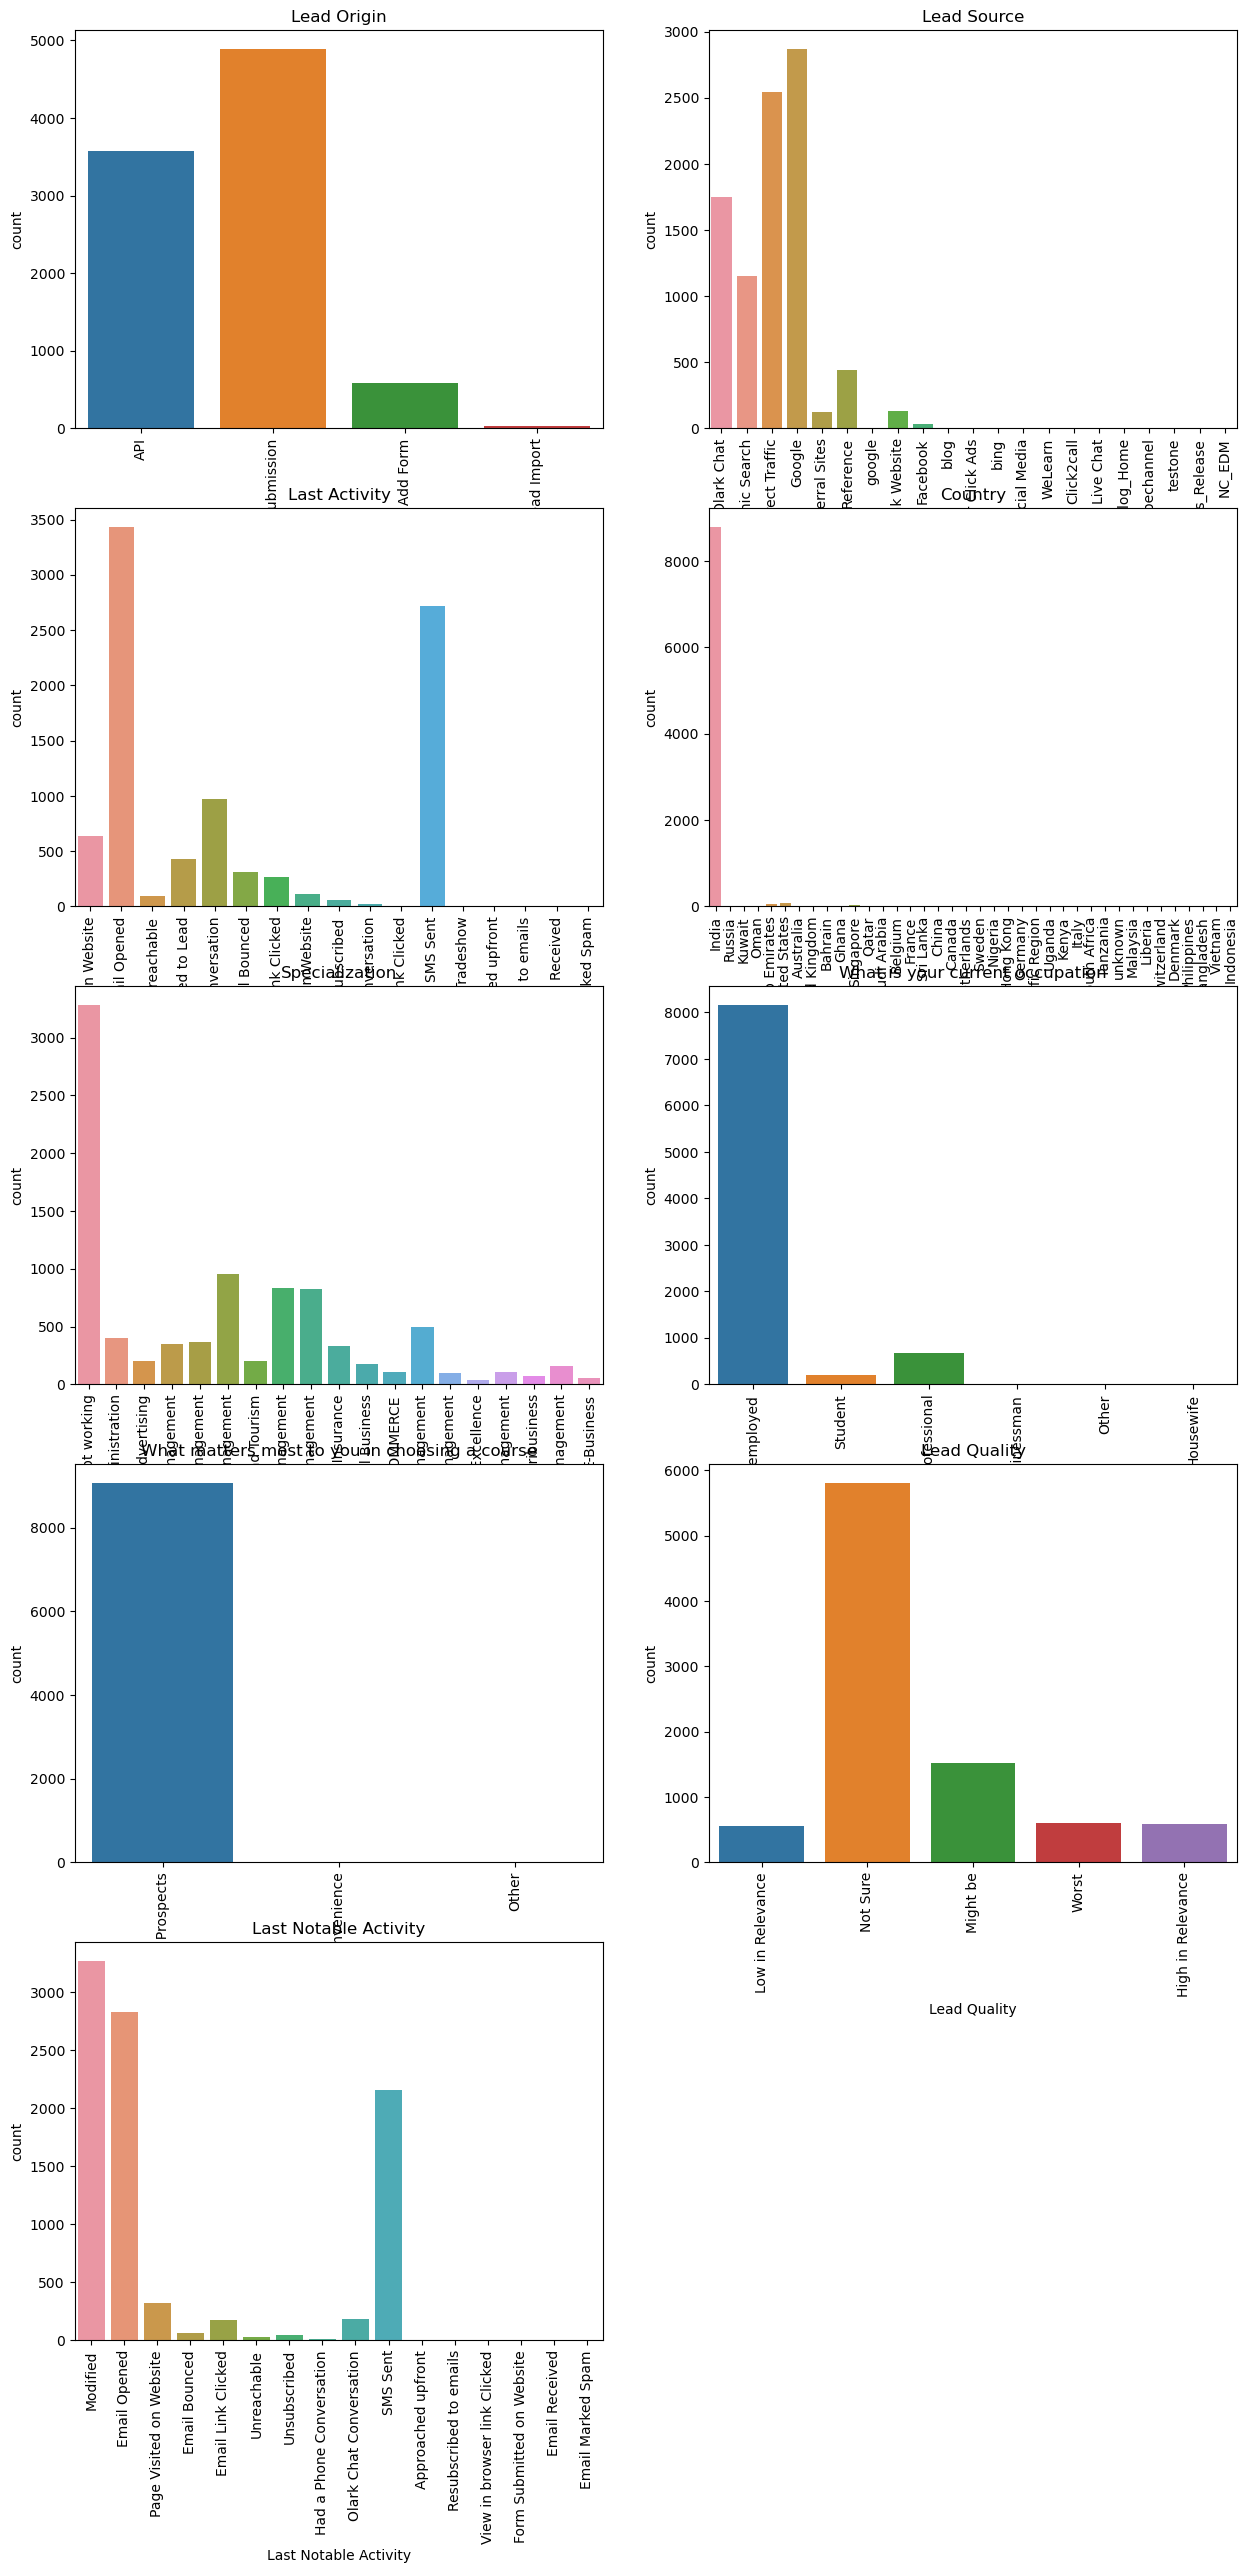

In [159]:
obj_col = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Lead Quality',
       'Last Notable Activity']

plt.figure(figsize= (15,30))
for i in range(len(obj_col)):
    plt.subplot(5,2,i+1)
    sns.countplot(x = data[obj_col[i]])
    plt.title(obj_col[i])
    plt.xticks(rotation = 90)
plt.show()

### Bivariate analysis
1. Relevant lead quality have high conversion ratio.
2. Leads from online websites have high conversion ratio.


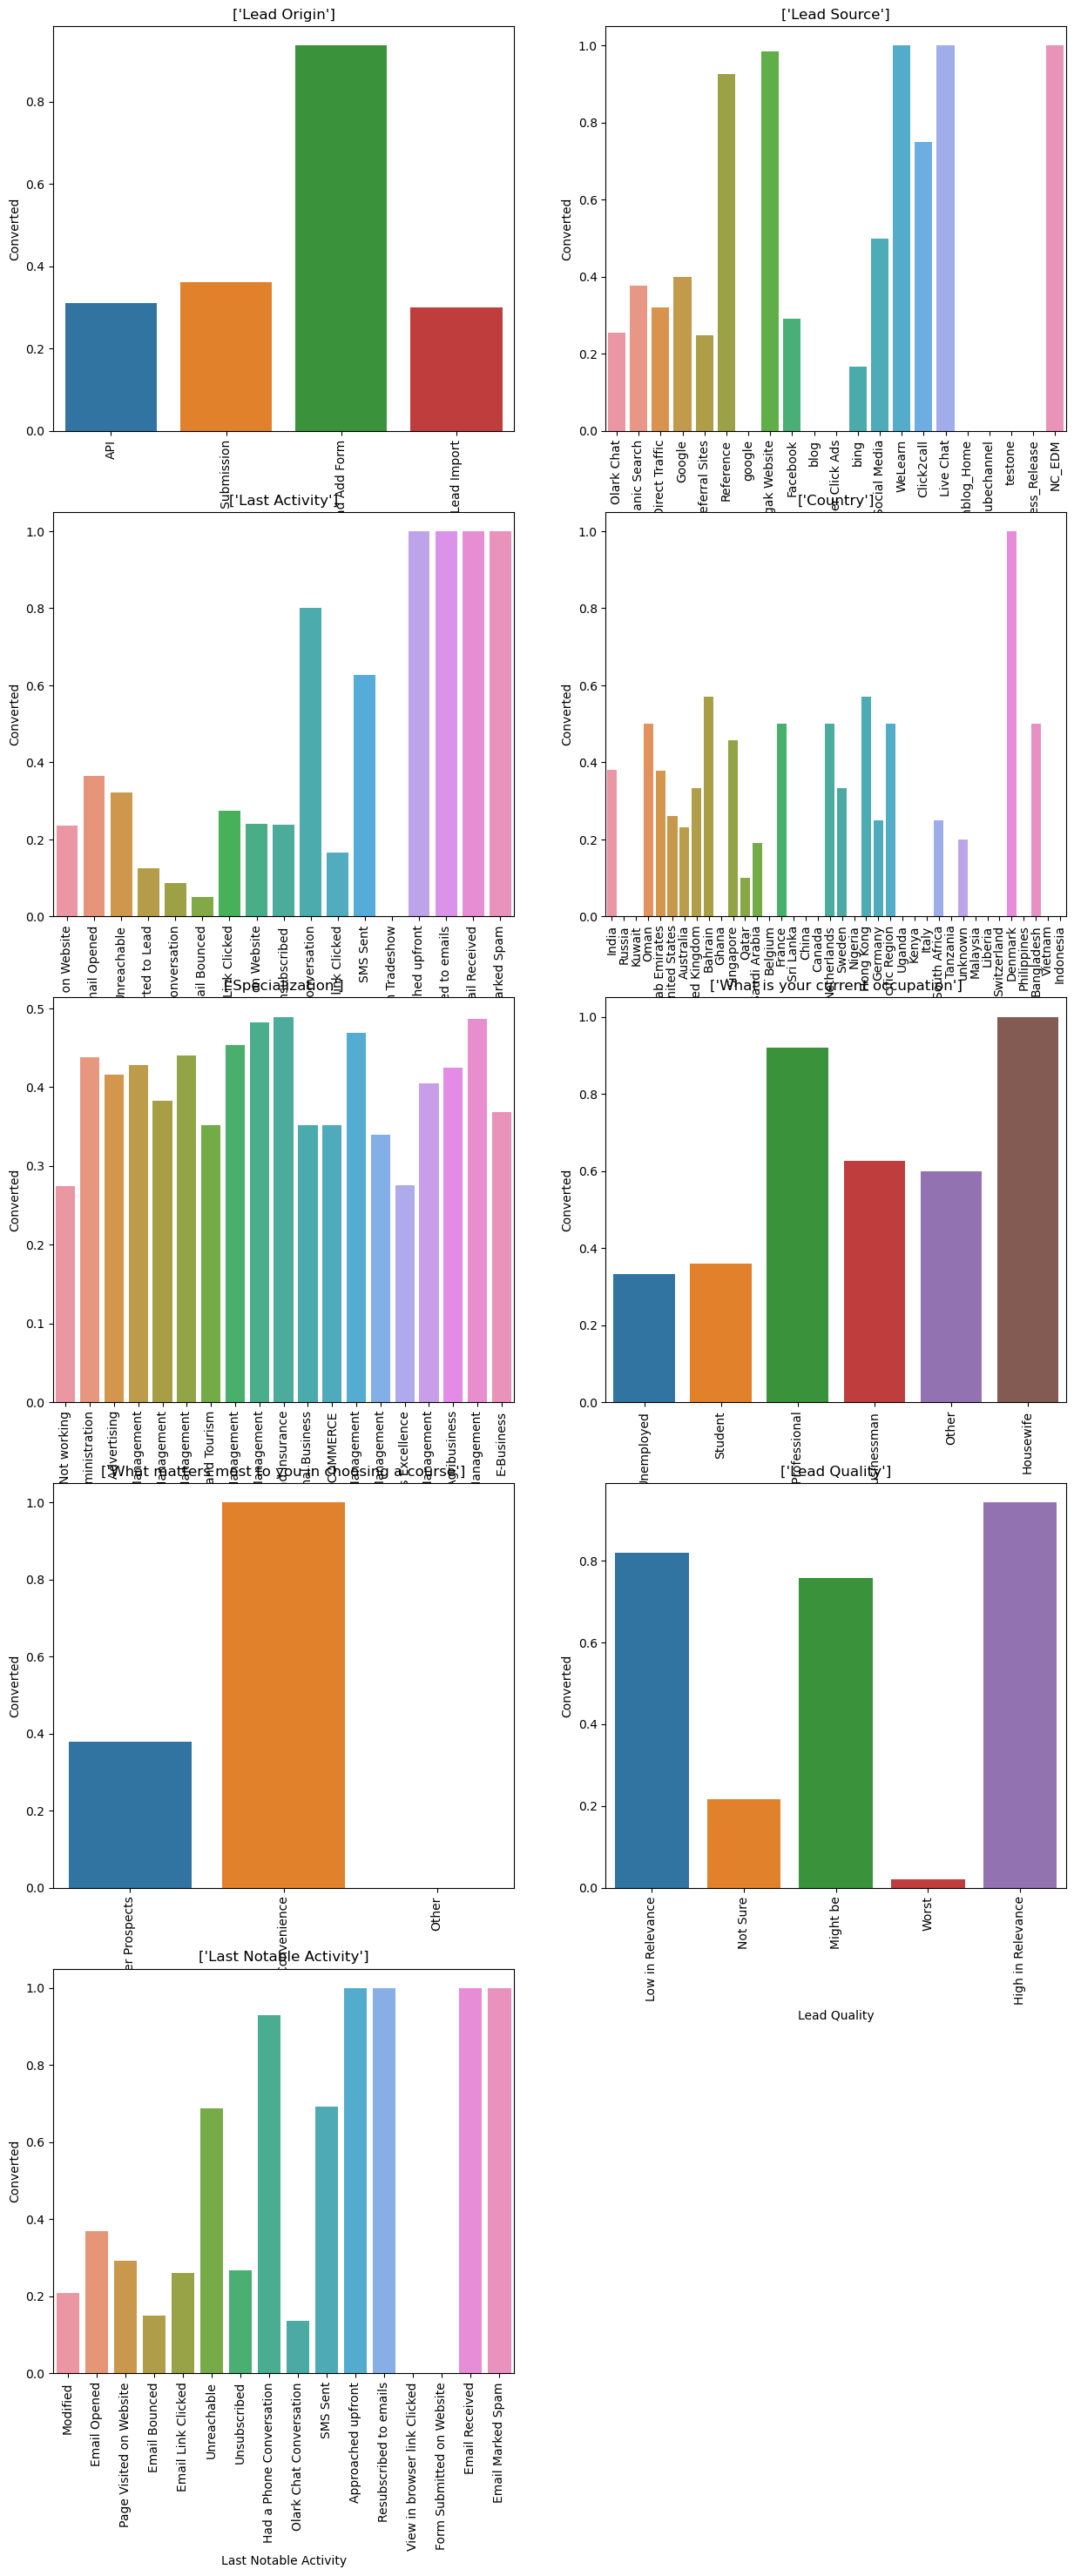

In [160]:
obj_col = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Lead Quality',
       'Last Notable Activity']

plt.figure(figsize= (15,35))
for i in range(len(obj_col[:30])):
    plt.subplot(5,2,i+1)
    sns.barplot(x = data[obj_col[i]], y = data.Converted, estimator = 'mean', errorbar = None)
    plt.title([obj_col[i]])
    plt.xticks(rotation = 90)
plt.show()

### Checking numerical columns

In [161]:
obj_col = data.select_dtypes(include=['int64', 'float64']).columns
obj_col

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [162]:
obj_col = ['Do Not Email', 'Do Not Call', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']

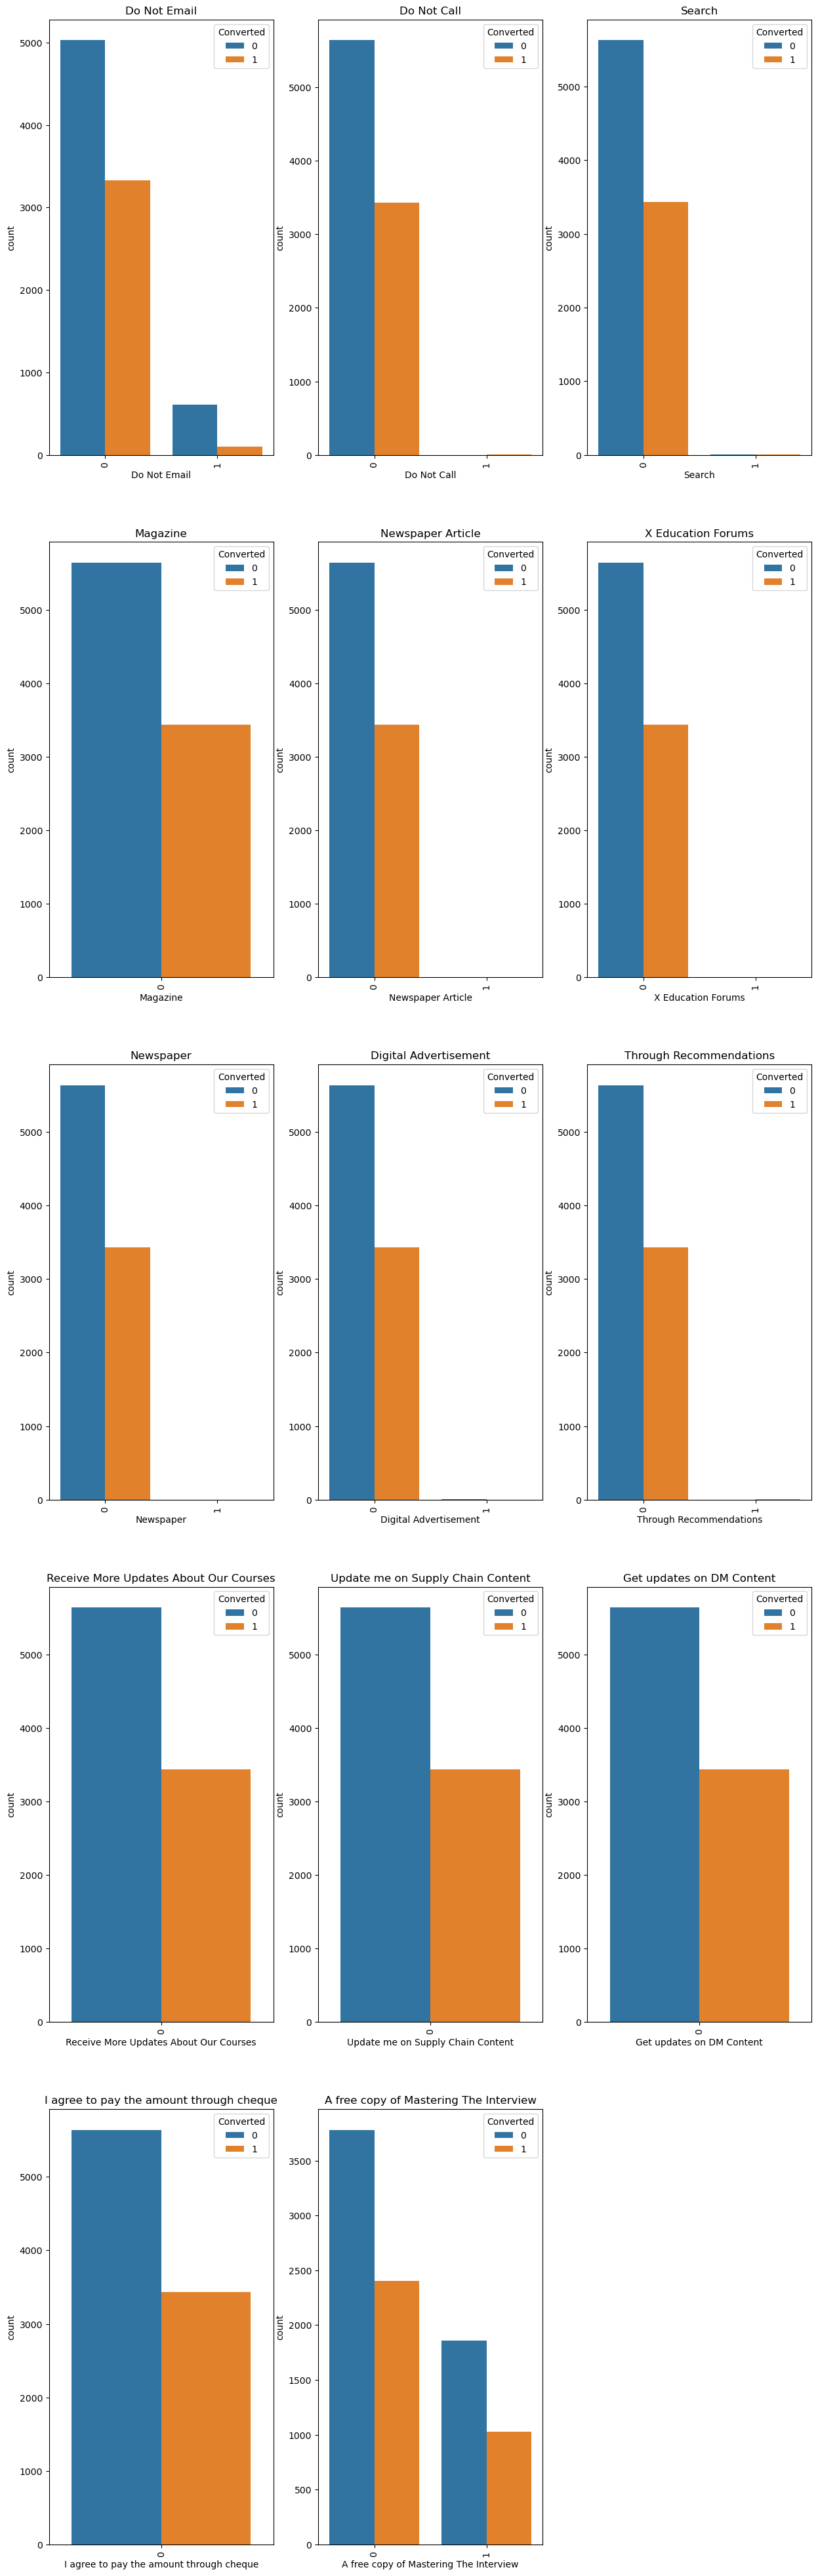

In [163]:
plt.figure(figsize= (15,50))
for i in range(len(obj_col)):
    plt.subplot(5,3,i+1)
    sns.countplot(x = data[obj_col[i]], hue= data.Converted)
    plt.title(obj_col[i])
    plt.xticks(rotation = 90)
plt.show()

In [164]:
#Some of the variables are constant. Therefore removing them
data = data[data.columns.difference(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'])]

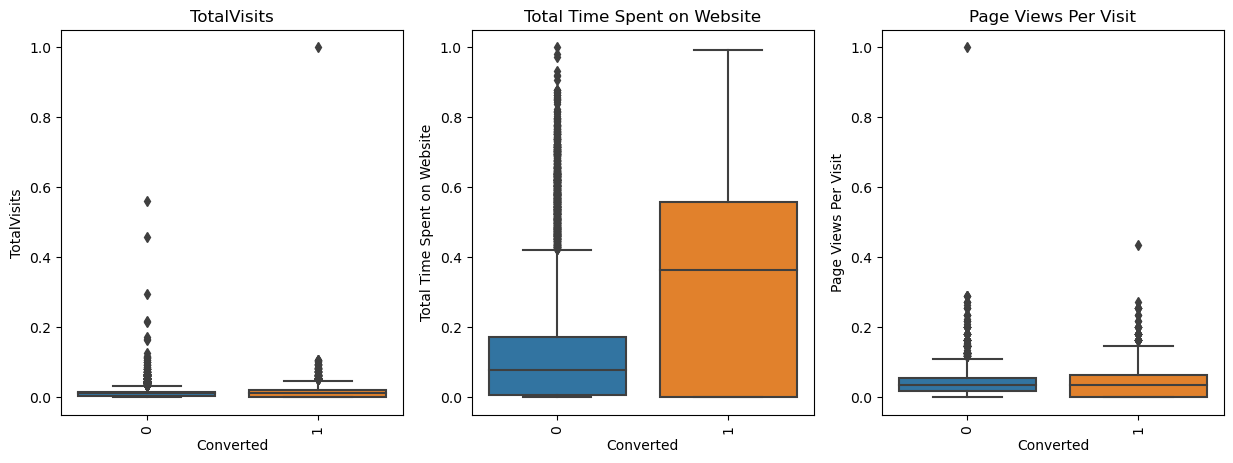

In [165]:
cont_col = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize= (15,5))
for i in range(len(cont_col)):
    plt.subplot(1,3,i+1)
    sns.boxplot(y = data[cont_col[i]], x = data.Converted)
    plt.title(cont_col[i])
    plt.xticks(rotation = 90)
plt.show()

Removing outliers

In [166]:
#removing outliers from total visits and pages view per visit
data = data[data.TotalVisits < 0.15]
data = data[data['Page Views Per Visit'] < 0.4]

In [167]:
#creating a category of others for categories having count less than 100 and also changing variables to dummy variables
def dummy(data):
    for column in data.select_dtypes(include=['object']).columns:
        data[column].where(data[column].map(data[column].value_counts()) > 100, 'Other', inplace= True)
        dummies = pd.get_dummies(data[column], prefix= column,drop_first= True)
        data.drop(column, axis = 1, inplace = True)
        data = pd.concat([data, dummies], axis = 1)
    return data
        
data = dummy(data)

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9064 entries, 0 to 9239
Data columns (total 61 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   A free copy of Mastering The Interview                9064 non-null   int64  
 1   Converted                                             9064 non-null   int64  
 2   Digital Advertisement                                 9064 non-null   int64  
 3   Do Not Call                                           9064 non-null   int64  
 4   Do Not Email                                          9064 non-null   int64  
 5   Newspaper                                             9064 non-null   int64  
 6   Newspaper Article                                     9064 non-null   int64  
 7   Page Views Per Visit                                  9064 non-null   float64
 8   Search                                                9064

In [169]:
data.head()

,A free copy of Mastering The Interview,Converted,Digital Advertisement,Do Not Call,Do Not Email,Newspaper,Newspaper Article,Page Views Per Visit,Search,Through Recommendations,Total Time Spent on Website,TotalVisits,X Education Forums,Country_Other,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not working,Specialization_Operations Management,Specialization_Other,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other
0,0,0,0,0,0,0,0,0.000000,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0.045455,0,0,0.296655,0.019920,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,1,1,0,0,0,0,0,0.036364,0,0,0.674296,0.007968,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0.018182,0,0,0.134243,0.003984,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0.018182,0,0,0.628521,0.007968,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


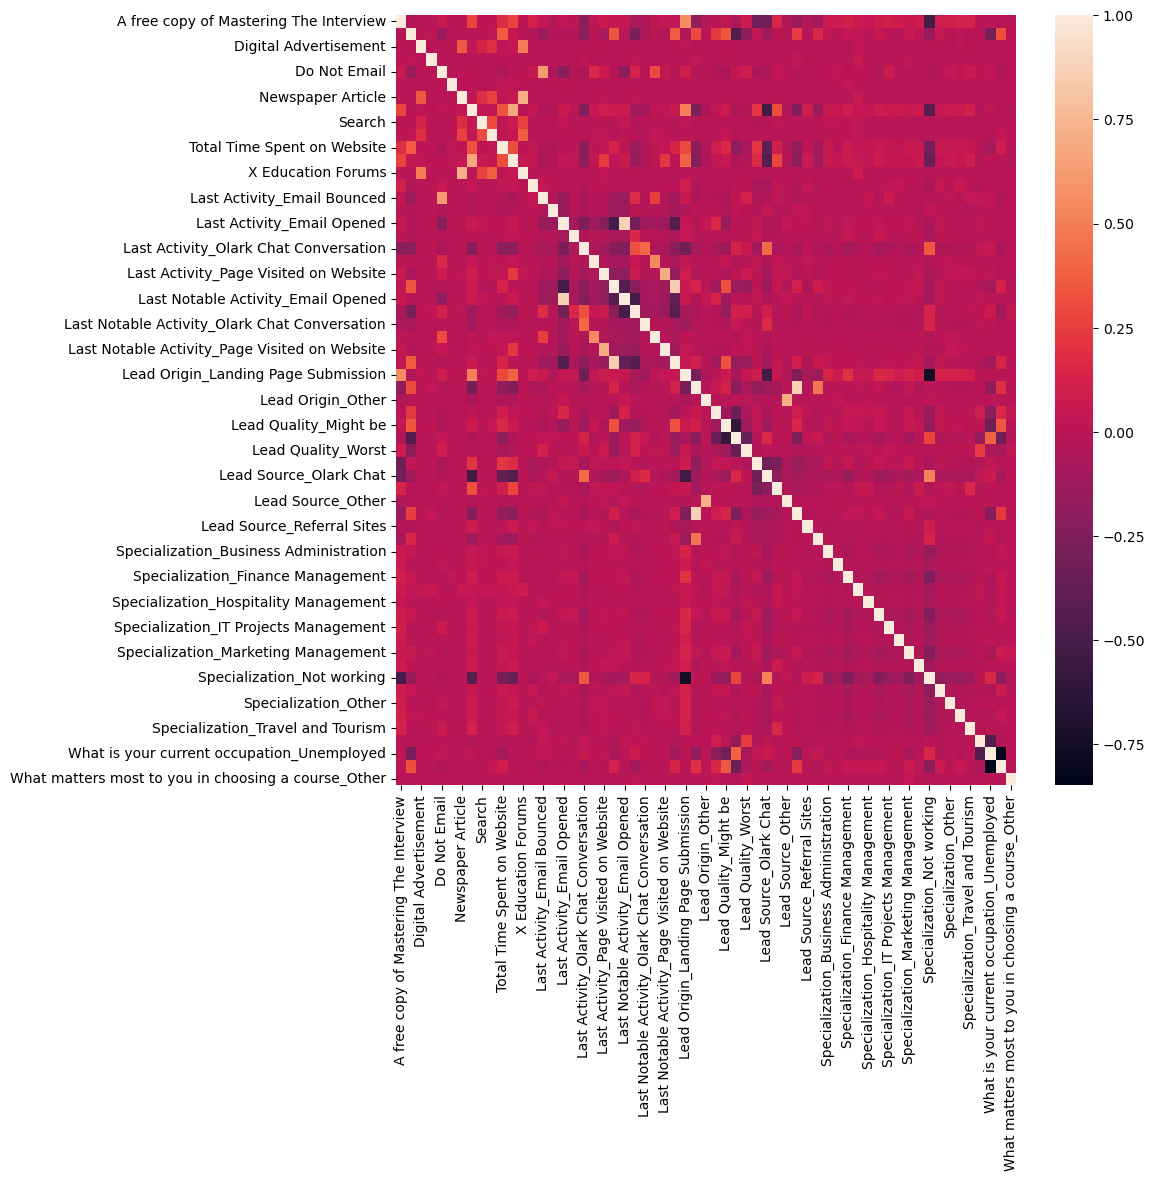

In [170]:
#checking correlation
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())
plt.show()

### Model building

In [171]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(data[data.columns.difference(['Converted'])], data.Converted, test_size= 0.20, random_state= 40)

In [172]:
X_train.head()

,A free copy of Mastering The Interview,Country_Other,Digital Advertisement,Do Not Call,Do Not Email,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Newspaper,Newspaper Article,Page Views Per Visit,Search,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not working,Specialization_Operations Management,Specialization_Other,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Through Recommendations,Total Time Spent on Website,TotalVisits,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,X Education Forums
2703,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.072727,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.029930,0.031873,0,1,0,0,0
3326,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.036364,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.639525,0.007968,0,1,0,0,0
124,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0.072727,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.720951,0.015936,0,1,0,0,0
740,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0.054545,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.061180,0.011952,0,1,0,0,0
1059,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.054545,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.022007,0.011952,0,1,0,0,0


In [173]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression( max_iter = 500)
rfe = RFE(estimator=logreg, n_features_to_select= 15)

In [174]:
rfe.fit(X_train, y_train)
print('Optimal number of features : %d' % rfe.n_features_)

Optimal number of features : 15


In [175]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('A free copy of Mastering The Interview', False, 40),
 ('Country_Other', False, 17),
 ('Digital Advertisement', False, 22),
 ('Do Not Call', False, 13),
 ('Do Not Email', True, 1),
 ('Last Activity_Email Bounced', False, 19),
 ('Last Activity_Email Link Clicked', False, 27),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Form Submitted on Website', False, 26),
 ('Last Activity_Olark Chat Conversation', False, 10),
 ('Last Activity_Other', False, 3),
 ('Last Activity_Page Visited on Website', False, 4),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Notable Activity_Email Opened', False, 46),
 ('Last Notable Activity_Modified', False, 14),
 ('Last Notable Activity_Olark Chat Conversation', False, 38),
 ('Last Notable Activity_Other', True, 1),
 ('Last Notable Activity_Page Visited on Website', False, 28),
 ('Last Notable Activity_SMS Sent', True, 1),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Other', False, 

In [176]:
sel_col = X_train.columns[rfe.support_]
sel_col

Index(['Do Not Email', 'Last Activity_SMS Sent', 'Last Notable Activity_Other',
       'Last Notable Activity_SMS Sent', 'Lead Origin_Lead Add Form',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Page Views Per Visit', 'Specialization_Hospitality Management',
       'Total Time Spent on Website', 'TotalVisits',
       'What is your current occupation_Working Professional'],
      dtype='object')

### Model 1

In [177]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[sel_col])
logml = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logml.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7251
Model:                            GLM   Df Residuals:                     7235
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2494.8
Date:                Sun, 26 Nov 2023   Deviance:                       4989.5
Time:                        00:50:38   Pearson chi2:                 7.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4738
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1543      0.150      1.025      0.305      -0.141       0.449
Do Not Email                                            -1.4455      0.190     -7.605      0.000      -1.818      -1.073
Last Activity_SMS Sent                                   0.6929      0.144      4.811      0.000       0.411       0.975
Last Notable Activity_Other                              1.4713      0.312      4.720      0.000       0.860       2.082
Last Notable Activity_SMS Sent                           1.1517      0.151      7.649      0.000       0.857       1.447
Lead Origin_Lead Add Form                                2.8107      0.256     10.982      0.000       2.309       3.312
Lead Quality_Might be                                   -1.5926      0.148    -10.735      0.000      -1.883      -1.302
Lead Quality_Not Sure                                   -3.2974      0.131    -25.079      0.000      -3.555      -3.040
Lead Quality_Worst                                      -5.4623      0.376    -14.521      0.000      -6.200      -4.725
Lead Source_Olark Chat                                   1.1716      0.124      9.463      0.000       0.929       1.414
Lead Source_Welingak Website                             3.4093      0.760      4.483      0.000       1.919       4.900
Page Views Per Visit                                    -6.9327      1.438     -4.820      0.000      -9.752      -4.114
Specialization_Hospitality Management                   -1.0106      0.350     -2.886      0.004      -1.697      -0.324
Total Time Spent on Website                              4.4847      0.173     25.892      0.000       4.145       4.824
TotalVisits                                             19.7316      3.403      5.798      0.000      13.062      26.402
What is your current occupation_Working Professional     1.7600      0.206      8.550      0.000       1.357       2.163
========================================================================================================================
"""

### removing variables having p value greater than 0.05

In [178]:
sel_col = X_train.columns[rfe.support_]
sel_col = sel_col.difference(['Lead Source_Reference', 'What is your current occupation_Student'])

In [179]:
sel_col

Index(['Do Not Email', 'Last Activity_SMS Sent', 'Last Notable Activity_Other',
       'Last Notable Activity_SMS Sent', 'Lead Origin_Lead Add Form',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Page Views Per Visit', 'Specialization_Hospitality Management',
       'Total Time Spent on Website', 'TotalVisits',
       'What is your current occupation_Working Professional'],
      dtype='object')

### Model 2

In [180]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[sel_col])
logml = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logml.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7251
Model:                            GLM   Df Residuals:                     7235
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2494.8
Date:                Sun, 26 Nov 2023   Deviance:                       4989.5
Time:                        00:50:38   Pearson chi2:                 7.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4738
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1543      0.150      1.025      0.305      -0.141       0.449
Do Not Email                                            -1.4455      0.190     -7.605      0.000      -1.818      -1.073
Last Activity_SMS Sent                                   0.6929      0.144      4.811      0.000       0.411       0.975
Last Notable Activity_Other                              1.4713      0.312      4.720      0.000       0.860       2.082
Last Notable Activity_SMS Sent                           1.1517      0.151      7.649      0.000       0.857       1.447
Lead Origin_Lead Add Form                                2.8107      0.256     10.982      0.000       2.309       3.312
Lead Quality_Might be                                   -1.5926      0.148    -10.735      0.000      -1.883      -1.302
Lead Quality_Not Sure                                   -3.2974      0.131    -25.079      0.000      -3.555      -3.040
Lead Quality_Worst                                      -5.4623      0.376    -14.521      0.000      -6.200      -4.725
Lead Source_Olark Chat                                   1.1716      0.124      9.463      0.000       0.929       1.414
Lead Source_Welingak Website                             3.4093      0.760      4.483      0.000       1.919       4.900
Page Views Per Visit                                    -6.9327      1.438     -4.820      0.000      -9.752      -4.114
Specialization_Hospitality Management                   -1.0106      0.350     -2.886      0.004      -1.697      -0.324
Total Time Spent on Website                              4.4847      0.173     25.892      0.000       4.145       4.824
TotalVisits                                             19.7316      3.403      5.798      0.000      13.062      26.402
What is your current occupation_Working Professional     1.7600      0.206      8.550      0.000       1.357       2.163
========================================================================================================================
"""

In [181]:
sel_col = sel_col.difference(['Last Activity_Other'])
sel_col

Index(['Do Not Email', 'Last Activity_SMS Sent', 'Last Notable Activity_Other',
       'Last Notable Activity_SMS Sent', 'Lead Origin_Lead Add Form',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Page Views Per Visit', 'Specialization_Hospitality Management',
       'Total Time Spent on Website', 'TotalVisits',
       'What is your current occupation_Working Professional'],
      dtype='object')

### Using variance inflation factor to eliminate recursive features

In [182]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X_train[sel_col].columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X_train[sel_col].values, i) 
                          for i in range(len(X_train[sel_col].columns))] 

vif_data

,feature,VIF
0,Do Not Email,1.212143
1,Last Activity_SMS Sent,5.458154
2,Last Notable Activity_Other,1.121830
3,Last Notable Activity_SMS Sent,4.968402
4,Lead Origin_Lead Add Form,1.498507
5,Lead Quality_Might be,1.961189
6,Lead Quality_Not Sure,3.199847
7,Lead Quality_Worst,1.179970
8,Lead Source_Olark Chat,1.692011
9,Lead Source_Welingak Website,1.319078


In [183]:
#removing variables having VIF > 5
features = vif_data['feature'][round(vif_data).VIF <= 5 ]
sel_col = list(features)
sel_col

['Do Not Email',
 'Last Activity_SMS Sent',
 'Last Notable Activity_Other',
 'Last Notable Activity_SMS Sent',
 'Lead Origin_Lead Add Form',
 'Lead Quality_Might be',
 'Lead Quality_Not Sure',
 'Lead Quality_Worst',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Page Views Per Visit',
 'Specialization_Hospitality Management',
 'Total Time Spent on Website',
 'TotalVisits',
 'What is your current occupation_Working Professional']

### Model 3

In [184]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[sel_col])
logml = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logml.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7251
Model:                            GLM   Df Residuals:                     7235
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2494.8
Date:                Sun, 26 Nov 2023   Deviance:                       4989.5
Time:                        00:50:39   Pearson chi2:                 7.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4738
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1543      0.150      1.025      0.305      -0.141       0.449
Do Not Email                                            -1.4455      0.190     -7.605      0.000      -1.818      -1.073
Last Activity_SMS Sent                                   0.6929      0.144      4.811      0.000       0.411       0.975
Last Notable Activity_Other                              1.4713      0.312      4.720      0.000       0.860       2.082
Last Notable Activity_SMS Sent                           1.1517      0.151      7.649      0.000       0.857       1.447
Lead Origin_Lead Add Form                                2.8107      0.256     10.982      0.000       2.309       3.312
Lead Quality_Might be                                   -1.5926      0.148    -10.735      0.000      -1.883      -1.302
Lead Quality_Not Sure                                   -3.2974      0.131    -25.079      0.000      -3.555      -3.040
Lead Quality_Worst                                      -5.4623      0.376    -14.521      0.000      -6.200      -4.725
Lead Source_Olark Chat                                   1.1716      0.124      9.463      0.000       0.929       1.414
Lead Source_Welingak Website                             3.4093      0.760      4.483      0.000       1.919       4.900
Page Views Per Visit                                    -6.9327      1.438     -4.820      0.000      -9.752      -4.114
Specialization_Hospitality Management                   -1.0106      0.350     -2.886      0.004      -1.697      -0.324
Total Time Spent on Website                              4.4847      0.173     25.892      0.000       4.145       4.824
TotalVisits                                             19.7316      3.403      5.798      0.000      13.062      26.402
What is your current occupation_Working Professional     1.7600      0.206      8.550      0.000       1.357       2.163
========================================================================================================================
"""

Most significant variables in decreasing order:
1. TotalVisits
2. Total Time Spent on Website
3. Lead Source_Welingak Website
4. Lead Origin_Lead Add Form
5. What is your current occupation_Working Professional
6. Lead Source_Olark Chat
7. Page Views Per Visit
8. Lead Quality_Worst	


In [185]:
y_predict = res.predict(X_train_sm)

In [186]:
res_df = pd.DataFrame({'Churn': y_train, 'Churn_prob': y_predict, })
res_df['predicted'] = res_df.Churn_prob.apply(lambda x: 1 if x > 0.35 else 0)
res_df.head()

,Churn,Churn_prob,predicted
2703,1,0.601865,1
3326,1,0.960056,1
124,0,0.475117,1
740,0,0.046930,0
1059,0,0.312379,0


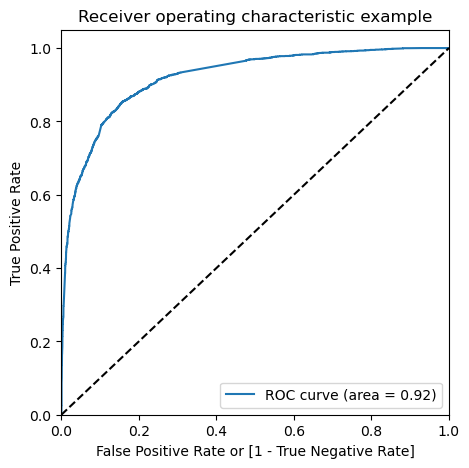

In [187]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(res_df.Churn, res_df.Churn_prob)

In [188]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    res_df['predicted'] = res_df.Churn_prob.apply(lambda x: 1 if x > i else 0)
    cm1 = metrics.confusion_matrix(res_df.Churn, res_df.predicted )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382154  1.000000  0.000000
0.1   0.1  0.674941  0.970408  0.492188
0.2   0.2  0.811061  0.914832  0.746875
0.3   0.3  0.841401  0.861422  0.829018
0.4   0.4  0.851469  0.814868  0.874107
0.5   0.5  0.849400  0.749188  0.911384
0.6   0.6  0.843056  0.702995  0.929688
0.7   0.7  0.834368  0.642367  0.953125
0.8   0.8  0.815474  0.560087  0.973437
0.9   0.9  0.776307  0.434139  0.987946


From the sensitivity and specificity tradeoff, cutoff of 0.35 is finalised to classify probabilities.

In [189]:
# Create confusion matrix
confusion = metrics.confusion_matrix(res_df.Churn, res_df.predicted)
confusion


array([[4426,   54],
       [1568, 1203]], dtype=int64)

In [190]:
# Calculate accuracy
print((metrics.accuracy_score(res_df.Churn, res_df.predicted) * 100).round())

78.0


In [191]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

sensitivity = TP/(TP+FN)
specificity = TN/(TN + FP)
precision = TP/(TP+FP)

print('Sensitivity:',sensitivity, '\n', 'Specificity:', specificity, '\n', 'Precision:', precision)

Sensitivity: 0.43413929989173583 
 Specificity: 0.9879464285714286 
 Precision: 0.9570405727923628


### Checking on test data

In [192]:
X_test_sm = sm.add_constant(X_test[sel_col])
y_predict = res.predict(X_test_sm)

In [193]:
res_df = pd.DataFrame({'Churn': y_test, 'Churn_prob': y_predict, })
res_df['predicted'] = res_df.Churn_prob.apply(lambda x: 1 if x > 0.5 else 0)
res_df.head()

,Churn,Churn_prob,predicted
8596,0,0.989495,1
70,0,0.121313,0
873,0,0.067489,0
4917,0,0.122231,0
4948,1,0.591145,1


In [194]:
# Create confusion matrix
confusion = metrics.confusion_matrix(res_df.Churn, res_df.predicted)
confusion


array([[1033,  118],
       [ 153,  509]], dtype=int64)

In [195]:
# Calculate accuracy
print((metrics.accuracy_score(res_df.Churn, res_df.predicted) * 100).round())

85.0


In [196]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

sensitivity = TP/(TP+FN)
specificity = TN/(TN + FP)
precision = TP/(TP+FP)

print('Sensitivity:',sensitivity, '\n', 'Specificity:', specificity, '\n', 'Precision:', precision)

Sensitivity: 0.7688821752265861 
 Specificity: 0.89748045178106 
 Precision: 0.8118022328548644


1. model has around 78% and 85% accuracy on train and test data.
2. area under roc curve is 0.92 having curve far aboive the 45 degree line.
3. Sensitivity, specificity and precision on test data is 76%, 89% and 81%.
